# Face Detection(Viola-Jones Object Detection Framework)
It is possible to detect very quickly if a face is in an image and locate it. However, for facial recognition there is a need to a large datasets and deep learning.

The this framework using **Haar Cascades**, using of a few key freatures, and also come up with the idea of pre-computing and integral images to save time on calculations. 

### Main Feature Types:

- Edge features:
  
<img src='images/edge_features.png' width=300>  

- Line features:

<img src='images/line_features.png' width=300>

- Four-rectangle Features

<img src='images/four_rectangle_features.png' width=150>
 

**Each feature** is a single value obtained by **subtracting** sum of pixels under **white rectangle** from sum of pixels under **black rectangle**(realistically the image will not be perfectly edges of lines).

<img src='images/feature_calculation.png' width=500> 

The features are calculated by:

**`mean(dark_region) - mean(light_region)`**

In the right hand side figure:

```
mean(dark_region) = 0.8125
mean(light_region) = 0.15
Delta = 0.8125 - 0.15 = 0.6625
```

- A **perfect edge** would result in a value of `1`. So, the **closer the result is to `1`**, the **better the feature**.
- Calculating these summations for the entire image is computationally expensive, so the idea of **integral** image resulting in an `O(1)` running time of the algorithm.

### Integral Image(Summed Area Table)

To sum up a subrectangle's value, each color spot hilights the sum inside the rectangle of that color.

<img src='images/integral_image.png' width=250>

### Cascade of Classifiers
The algorithm also saves time by using cascade classifiers, and treat the image into a series(cascade) of classifiers based on the features shown earlier. Once an image **failes a classifier**, attempting to **detect a face** is **stopped**.

> **Note:**
> 
> This is a misconception that this algorithm **slowly "scans"** the entire image for dectectin a face.
>
> This is **inefficient** and instead, the image is fed to a **cascade of classifiers**.

<br>

Here is an example for cascading. The image is fed to **a chain of classifiers** to detect whether there is a specific feature on it or not. If a **failure** is occured after passing the image to a classifier, then the algorithm state there is **no face**. If it **passed**, then search for the **next feature** is begun. We contiune through this cascade, until the algorithm detects the face.

<br>
<br>
<img src='images/cascade_of_classifiers.png'>

> **Note:**
> 
> This method is applicable for detecting a wide variety of objects.


- The **downside** of this algorithm is that very large dataset is needed to create your own features. Luckily, pre-trained sets of features(pretrained classifiers) already exists. In **OpenCv** comes with pre-trained `xml` files of various Haar Cascades.
---

<br>

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#### Images

In [8]:
nadia = cv2.imread('images/Nadia_Murad.jpg',0)
denis = cv2.imread('images/Denis_Mukwege.jpg',0)
solvay = cv2.imread('images/solvay_conference.jpg',0)

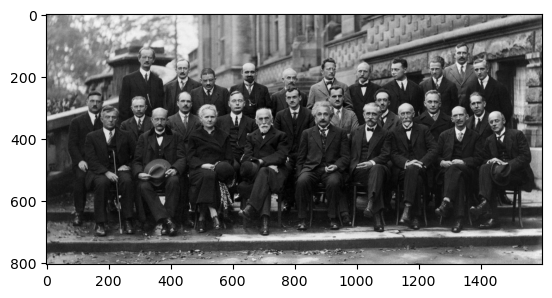

In [9]:
# Visualizing one of the images for instance
plt.imshow(solvay,cmap='gray')

#### Cascade files

OpenCV comes with pre-trained cascade files. Some of these `.xml` files are  relocated  in the same directory of this notebook.

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [16]:
def detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 

    # x, y are the top-left coordinates of window and w, h are the weight and hight respectively
    for (x,y,w,h) in face_rects: 
        
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

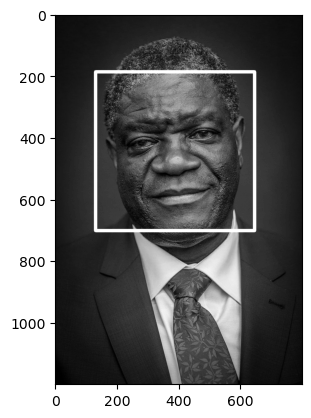

In [18]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

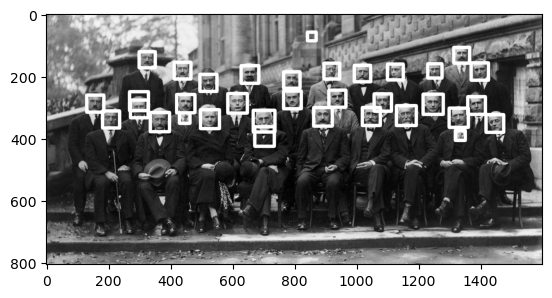

In [19]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [ ]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    